# Naive acceleration calculations

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
from pathlib import Path
import numpy as np
from astropy import units as u
from astropy import constants as c
from itertools import product
import yssbtmpy as tm

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import LogLocator


from accutil import (linticker)

RADII = np.concatenate([np.arange(0.5, 1, 0.1),
                       np.arange(1, 16.1, 0.5),
                       np.arange(20, 41, 5)])
FIGDIR = Path("./figs")

In [3]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

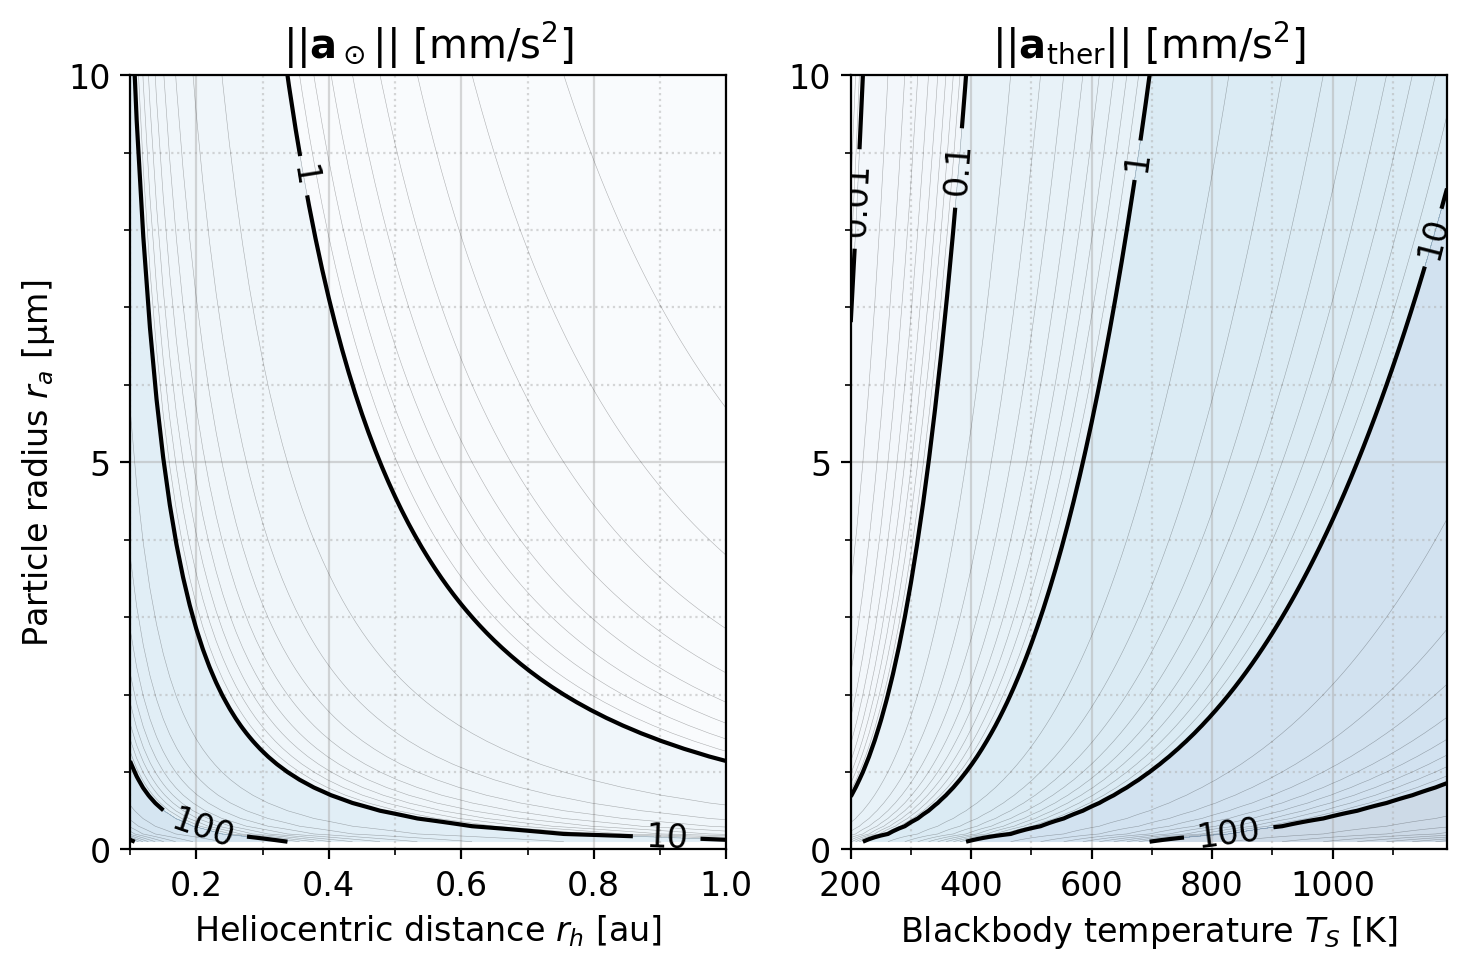

In [4]:
kws_sun = dict(ls=['-', '--', ':'])

rhs = np.arange(0.1, 1.01, 0.01)*u.au  # [AU]
ras = np.arange(0.1, 10.1, 0.1)*u.um  # [µm]
temps = np.arange(200, 1200, 10)*u.K  # [K]
Qprbar = 1
height_par = 1
rho_ptcl = 3000*u.kg/u.m**3
emissivity = 0.9

const = (3*c.sigma_sb/(4*c.c)).si
solar_rt = (c.R_sun**2 * (5777*u.K)**4).si

# to mm/s^2
hh, rr1 = np.meshgrid(rhs, ras)
a_sun = 1000*(const*solar_rt*Qprbar/(hh**2*rr1*rho_ptcl)).si.value
tt, rr2 = np.meshgrid(temps, ras)
a_ther = 1000*(const*emissivity*height_par*Qprbar/(rr2*rho_ptcl)*tt**4).si.value

loglevels = np.sort(np.outer(1+np.arange(9), 10**np.arange(-5, 5, 1.)).flatten())

fig, axs = plt.subplots(1, 2, figsize=(7.5, 5))

# contourf
axs[0].contourf(hh, rr1, a_sun, locator=LogLocator(), cmap='Blues', alpha=0.2)
axs[1].contourf(tt, rr2, a_ther, locator=LogLocator(), cmap='Blues', alpha=0.2)
# detailed contours
axs[0].contour(hh, rr1, a_sun, levels=loglevels, colors='k', linestyles='-', linewidths=0.2, alpha=0.3)
axs[1].contour(tt, rr2, a_ther, levels=loglevels, colors='k', linestyles='-', linewidths=0.2, alpha=0.3)
# major contours
cs1 = axs[0].contour(hh, rr1, a_sun, locator=LogLocator(), colors='k', linestyles='-')
cs2 = axs[1].contour(tt, rr2, a_ther, locator=LogLocator(), colors='k', linestyles='-')
cs1.clabel(fmt='%.4g', colors='k')
cs2.clabel(fmt='%.4g', colors='k')

axs[0].set(
    ylim=(0, 10),
    title=r"$|| \mathbf{a}_\odot || ~[\mathrm{mm/s^2}]$",
    xlabel=r"Heliocentric distance $r_h$ [au]",
    ylabel=r"Particle radius $r_a$ [µm]"    
)
axs[1].set(
    ylim=(0, 10),
    title=r"$|| \mathbf{a}_\mathrm{ther} || ~[\mathrm{mm/s^2}]$",
    xlabel=r"Blackbody temperature $T_S$ [K]",
)
linticker(axs[0], 
          xmajlockws=0.2, xminlockws=0.1,
          ymajlockws=5, yminlockws=1
          )
linticker(axs[1], 
          xmajlockws=200, xminlockws=100,
          ymajlockws=5, yminlockws=1
          )
plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"acc_values.pdf")
plt.savefig(FIGDIR/"acc_values.png", dpi=300)